In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv
/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv


# Sklearn IMPORTS

In [10]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVR, SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV, TimeSeriesSplit, RandomizedSearchCV
from sklearn.linear_model import LinearRegression,  Ridge, Lasso, ElasticNet
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import time
import seaborn as sns


## Dummy Reg

In [11]:
csv_path = {
    "booknow_booking.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_booking/booknow_booking.csv",
    "booknow_theaters.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_theaters/booknow_theaters.csv",
    "booknow_visits.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/booknow_visits/booknow_visits.csv",
    "cinePOS_booking.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_booking/cinePOS_booking.csv",
    "cinePOS_theaters.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/cinePOS_theaters/cinePOS_theaters.csv",
    "date_info.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/date_info/date_info.csv",
    "movie_theater_id_relation.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/movie_theater_id_relation/movie_theater_id_relation.csv",
    "sample_submission.csv": "/kaggle/input/Cinema_Audience_Forecasting_challenge/sample_submission/sample_submission.csv"
}

In [12]:
df1 = pd.read_csv(csv_path['booknow_booking.csv'])
df2 = pd.read_csv(csv_path['booknow_theaters.csv'])
df3 = pd.read_csv(csv_path['booknow_visits.csv'])
df4 = pd.read_csv(csv_path['cinePOS_booking.csv'])
df5 = pd.read_csv(csv_path['cinePOS_theaters.csv'])
df6 = pd.read_csv(csv_path['date_info.csv'])
df7 = pd.read_csv(csv_path['movie_theater_id_relation.csv'])
df8 = pd.read_csv(csv_path['sample_submission.csv'])


CRESTION OF DF

In [13]:
# df6["show_date"].max()  = '2024-06-30'
# df6["show_date"].min() = '2023-01-01'
# df3["book_theater_id"].max() = book_00829
# df3["book_theater_id"].min() = book_00001
# so df = 829 booking IDs × 547 dates = 453,463 rows total.

#### INITIAL DATA EXPLORATION

In [14]:
booknow_booking = pd.read_csv(csv_path['booknow_booking.csv'])
booknow_theaters = pd.read_csv(csv_path['booknow_theaters.csv'])
booknow_visits = pd.read_csv(csv_path['booknow_visits.csv'])
cinepos_booking = pd.read_csv(csv_path['cinePOS_booking.csv'])
cinepos_theaters = pd.read_csv(csv_path['cinePOS_theaters.csv'])
date_info = pd.read_csv(csv_path['date_info.csv'])
movie_theater_relation = pd.read_csv(csv_path['movie_theater_id_relation.csv'])
sample_submission = pd.read_csv(csv_path['sample_submission.csv'])


In [15]:

print("\nDataset Shapes:")
print(f"  df1 (BookNow Booking):     {df1.shape}")
print(f"  df2 (BookNow Theaters):    {df2.shape}")
print(f"  df3 (BookNow Visits):      {df3.shape} <- TARGET HERE")
print(f"  df4 (CinePOS Booking):     {df4.shape}")
print(f"  df5 (CinePOS Theaters):    {df5.shape}")
print(f"  df6 (Date Info):           {df6.shape}")
print(f"  df7 (Theater Mapping):     {df7.shape}")
print(f"  df8 (Sample Submission):   {df8.shape}")



Dataset Shapes:
  df1 (BookNow Booking):     (68336, 4)
  df2 (BookNow Theaters):    (829, 5)
  df3 (BookNow Visits):      (214046, 3) <- TARGET HERE
  df4 (CinePOS Booking):     (1641966, 4)
  df5 (CinePOS Theaters):    (4690, 5)
  df6 (Date Info):           (547, 2)
  df7 (Theater Mapping):     (150, 2)
  df8 (Sample Submission):   (38062, 2)


In [16]:
# EDA
print("df1: BookNow Booking Data")
print(df1.info())
df1.head()

df1: BookNow Booking Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68336 entries, 0 to 68335
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_theater_id   68336 non-null  object
 1   show_datetime     68336 non-null  object
 2   booking_datetime  68336 non-null  object
 3   tickets_booked    68336 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 2.1+ MB
None


,book_theater_id,show_datetime,booking_datetime,tickets_booked
0,book_00244,2023-01-01 19:00:00,2023-01-01 16:00:00,1
1,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,3
2,book_00740,2023-01-01 19:00:00,2023-01-01 19:00:00,6
3,book_00244,2023-01-01 20:00:00,2023-01-01 16:00:00,2
4,book_00151,2023-01-01 20:00:00,2023-01-01 01:00:00,5


In [17]:
print(df2.info())
print(f"\nUnique theater types: {df2['theater_type'].unique()}")
print(f"Number of areas: {df2['theater_area'].nunique()}")
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   book_theater_id  314 non-null    object 
 1   theater_type     829 non-null    object 
 2   theater_area     829 non-null    object 
 3   latitude         829 non-null    float64
 4   longitude        829 non-null    float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB
None

Unique theater types: ['Drama' 'Other' 'Action' 'Comedy']
Number of areas: 103


,book_theater_id,theater_type,theater_area,latitude,longitude
0,book_00093,Drama,Area_001,22.619233,78.113017
1,book_00078,Drama,Area_001,22.619233,78.113017
2,book_00291,Drama,Area_001,22.619233,78.113017
3,book_00258,Drama,Area_001,22.619233,78.113017
4,book_00212,Drama,Area_002,23.004410,79.934515


In [18]:
print(df3.info())
print("\nTarget Variable Stats:")
print(df3['audience_count'].describe())
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   book_theater_id  214046 non-null  object
 1   show_date        214046 non-null  object
 2   audience_count   214046 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.9+ MB
None

Target Variable Stats:
count    214046.000000
mean         41.616568
std          32.834918
min           2.000000
25%          18.000000
50%          34.000000
75%          58.000000
max        1350.000000
Name: audience_count, dtype: float64


,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12


In [19]:
print("df4: ")
print("\n POS Booking Information")
print(df4.info())
(df3.head())


df4: 

 POS Booking Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1641966 entries, 0 to 1641965
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   cine_theater_id   1641966 non-null  object
 1   show_datetime     1641966 non-null  object
 2   booking_datetime  1641966 non-null  object
 3   tickets_sold      1641966 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 50.1+ MB
None


,book_theater_id,show_date,audience_count
0,book_00001,2023-01-13,50
1,book_00001,2023-01-14,64
2,book_00001,2023-01-15,58
3,book_00001,2023-01-16,44
4,book_00001,2023-01-18,12


In [20]:
print("df6: Date Information")
print(df6.info())
df6.head()

df6: Date Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   show_date    547 non-null    object
 1   day_of_week  547 non-null    object
dtypes: object(2)
memory usage: 8.7+ KB
None


,show_date,day_of_week
0,2023-01-01,Sunday
1,2023-01-02,Monday
2,2023-01-03,Tuesday
3,2023-01-04,Wednesday
4,2023-01-05,Thursday


In [21]:

print("df7: ")
print("\n theater id and POS id Relation")
print(df7.info())
(df7.head())


df7: 

 theater id and POS id Relation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   book_theater_id  150 non-null    object
 1   cine_theater_id  150 non-null    object
dtypes: object(2)
memory usage: 2.5+ KB
None


,book_theater_id,cine_theater_id
0,book_00509,cinePOS_01261
1,book_00063,cinePOS_02467
2,book_00054,cinePOS_08923
3,book_00094,cinePOS_02479
4,book_00052,cinePOS_06750


In [22]:
print("df8: Submission Format")
print(df8.head(1))
print(df8.tail(1))
# test date = 1 march to 22 april 

df8: Submission Format
                      ID  audience_count
0  book_00001_2024-03-01               0
                          ID  audience_count
38061  book_00829_2024-04-22               0


#### Target Variable Analysis

In [23]:
# need to check for outliers, distribution patterns, and temporal trends
#helps in feature engineering
df3['show_date'] = pd.to_datetime(df3['show_date'])
print("\nBasic Statistics:")
print(df3['audience_count'].describe())

print(f"\nDate Range in Training Data:")
print(f"From:{df3['show_date'].min()}")
print(f"To:{df3['show_date'].max()}")
print(f"Total days:{(df3['show_date'].max() - df3['show_date'].min()).days}")

print(f"\nNumber of theaters in training: {df3['book_theater_id'].nunique()}")
print(f"Total records: {len(df3)}")
print(f"Average records per theater: {len(df3) / df3['book_theater_id'].nunique():.1f}")



Basic Statistics:
count    214046.000000
mean         41.616568
std          32.834918
min           2.000000
25%          18.000000
50%          34.000000
75%          58.000000
max        1350.000000
Name: audience_count, dtype: float64

Date Range in Training Data:
From:2023-01-01 00:00:00
To:2024-02-28 00:00:00
Total days:423

Number of theaters in training: 826
Total records: 214046
Average records per theater: 259.1


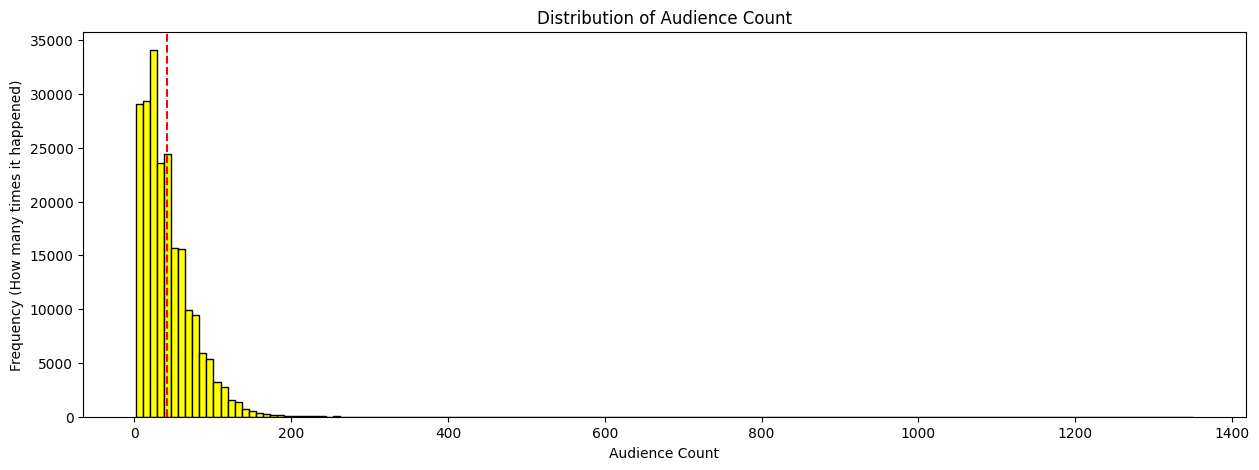

In [24]:
plt.figure(figsize=(15, 5))
plt.hist(df3['audience_count'], bins=150, color='yellow', edgecolor='black')
plt.title("Distribution of Audience Count")
plt.xlabel("Audience Count")
plt.ylabel("Frequency (How many times it happened)")
plt.axvline(df3['audience_count'].mean(), color='red', linestyle='--', label='Average Value (Mean)')
plt.show()



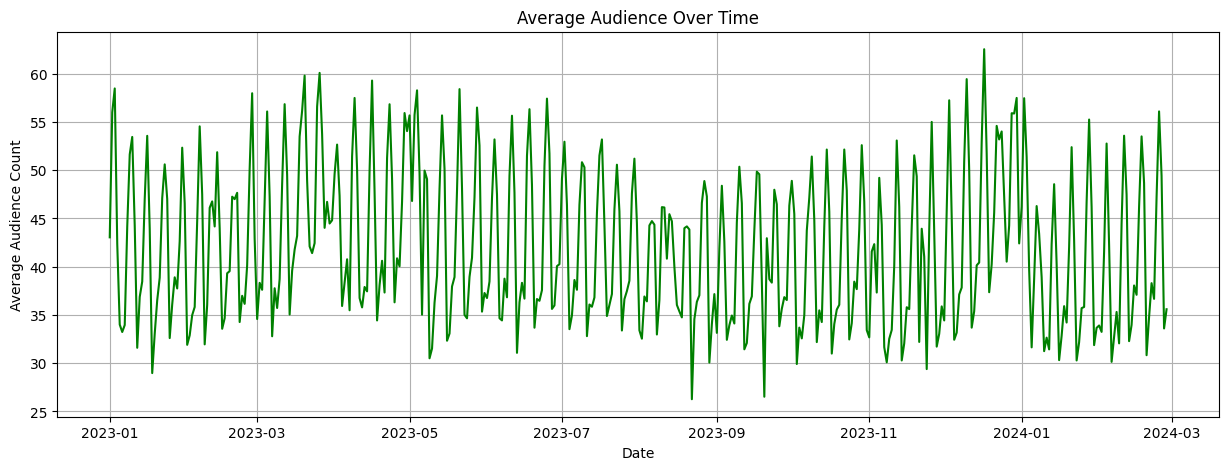

In [25]:
plt.figure(figsize=(15, 5))
daily_avg = df3.groupby('show_date')['audience_count'].mean()
plt.plot(daily_avg.index, daily_avg.values, color='green')
plt.title("Average Audience Over Time")
plt.xlabel("Date")
plt.ylabel("Average Audience Count")
plt.grid(True)
plt.show()

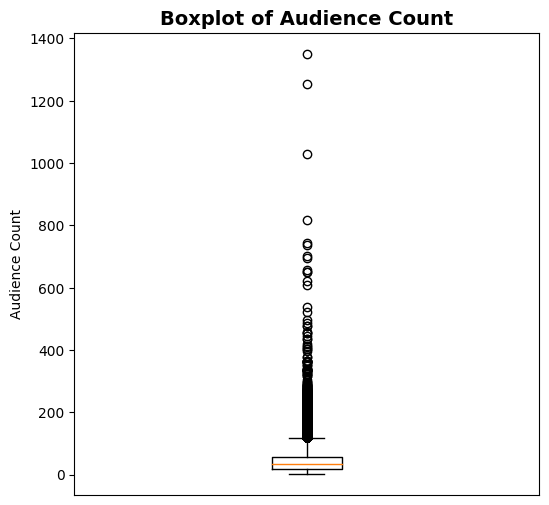

In [26]:
plt.figure(figsize=(6, 6))
plt.boxplot(df3['audience_count'])
plt.title("Boxplot of Audience Count", fontsize=14, fontweight='bold')
plt.ylabel("Audience Count")
plt.xticks([])
plt.show()



In [27]:
# calculating outlier bond
Q1 = df3['audience_count'].quantile(0.25)
Q2 = df3['audience_count'].quantile(0.50)
Q3 = df3['audience_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


print(f"IQR:{IQR}")
print(f"lower Bound:{lower_bound}")
print(f"upper Bound:{upper_bound}")

outliers = df3[(df3['audience_count'] < lower_bound) | (df3['audience_count'] > upper_bound)]
print(f"Outliers detected: {len(outliers)} rows ({len(outliers)/len(df3)*100}%)")
print(f"Max audience count: {df3['audience_count'].max()}")


IQR:40.0
lower Bound:-42.0
upper Bound:118.0
Outliers detected: 5589 rows (2.6111209739962438%)
Max audience count: 1350


In [28]:
# missing value analysis
def check_missing(df, name):
    print(f"\n{name}:")
    missing = df.isnull().sum()
    if missing.sum() == 0:
        print("No missing values!")
    else:
        missing_pct = (missing / len(df) * 100).round(2)
        missing_df = pd.DataFrame({
            'Count': missing[missing > 0], 
            'Percentage': missing_pct[missing > 0]
        })
        print(missing_df)

check_missing(df1,"df1 (BookNow Booking)")
check_missing(df2,"df2 (BookNow Theaters)")
check_missing(df3,"df3 (BookNow Visits)")
check_missing(df6,"df6 (Date Info)")


df1 (BookNow Booking):
No missing values!

df2 (BookNow Theaters):
                 Count  Percentage
book_theater_id    515       62.12

df3 (BookNow Visits):
No missing values!

df6 (Date Info):
No missing values!


### Insights from basic EDA
1. df2 has theater metadata (type, area, location)
2. df3 has our TARGET variable (audience_count)
3. df6 has calendar information (day of week)
4. need to predict for 1st march to 22nd April 2024 (both inclusive)
5. df3 has 214046 rows while df1 has only 68336 
6. From df3 we know total 826 unique theaters are present and total day are 423
7. final df need a complete skeleton dataframe of all theater-date combinations
   skeleton df row = 826 * 423 = 341548
8. audience count majorly lies between 18 - 59 with upper bound at 118
9. there are some outlier of audience count present from 118 to 1350 which covers about 2.6% (approx) of total df3
10. graph of average audinece count shows too much upward or downward trend which means train df needs to introduce weekends, holiday(sunday), lag, roll,


### Stratigy
1. for lat, long empty values will be replace by median
2. for categorical (theater_area, theater_type) i'll use unknown_area or unknown_type
3. i'll create ALL possible theater-date combinations (424 days × 829 theaters = 351,496 rows) so finally I'll  have a complete timeline for each theater
4. Missing dates will help us identify when theaters were closed
5. Then Merging will be introduced of main df with other other dataframes

In [29]:
# skeleton df
# Create date range
start_date = dt.date(2023, 1, 1)
end_date = dt.date(2024, 2, 28)
dates = pd.date_range(start=start_date, end=end_date)

# Create theater IDs
booking_ids = [f"book_{i:05d}" for i in range(1, 830)]
print(f"dates: {len(dates)} days")
print(f"theaters: {len(booking_ids)}")
print(f"total combinations: {len(dates) * len(booking_ids)}")

# Create base dataframe
f_t_df = pd.DataFrame(
    [(b, d) for d in dates for b in booking_ids],
    columns=["book_theater_id", "show_date"]
)

f_t_df["show_date"] = pd.to_datetime(f_t_df["show_date"])
f_t_df["ID"] = f_t_df["book_theater_id"] + "_" + f_t_df["show_date"].dt.strftime("%Y-%m-%d")

print(f"base df created: {f_t_df.shape}")
print(f"columns: {f_t_df.columns.tolist()}")


dates: 424 days
theaters: 829
total combinations: 351496
base df created: (351496, 3)
columns: ['book_theater_id', 'show_date', 'ID']


In [30]:
# Merge df6 into main df 
df6['show_date'] = pd.to_datetime(df6['show_date'])
f_t_df = f_t_df.merge(df6, on='show_date', how='left')
f_t_df.shape

(351496, 4)

In [31]:
# Merge df3 into main df 
f_t_df = f_t_df.merge(df3, on=['book_theater_id', 'show_date'], how='left')
print(f"rows with audience:{f_t_df['audience_count'].notna().sum()}")
print(f"rows without audience:{f_t_df['audience_count'].isna().sum()}")


rows with audience:214046
rows without audience:137625


In [32]:
# Merge df2 into main df 
f_t_df = f_t_df.merge(df2, on='book_theater_id', how='left')
f_t_df.shape


(351671, 9)

In [33]:
f_t_df['latitude'] = f_t_df['latitude'].fillna(f_t_df['latitude'].median())
f_t_df['longitude'] = f_t_df['longitude'].fillna(f_t_df['longitude'].median())
f_t_df['theater_area'] = f_t_df['theater_area'].fillna('unknown_area')
f_t_df['theater_type'] = f_t_df['theater_type'].fillna('unknown_type')


In [34]:
print(f_t_df.isnull().sum()[f_t_df.isnull().sum() > 0])


audience_count    137625
dtype: int64


### Feature Engineering

#### Date Related

In [35]:
# Extract basic date features
f_t_df['show_day'] = f_t_df['show_date'].dt.day
f_t_df['show_month'] = f_t_df['show_date'].dt.month
f_t_df['show_year'] = f_t_df['show_date'].dt.year
f_t_df['encoded_day_of_week'] = f_t_df['show_date'].dt.dayofweek
f_t_df['day_of_year'] = f_t_df['show_date'].dt.dayofyear
f_t_df['week_of_year'] = f_t_df['show_date'].dt.isocalendar().week
f_t_df['quarter'] = f_t_df['show_date'].dt.quarter

# Create weekend indicators
f_t_df['is_weekend'] = (f_t_df['encoded_day_of_week'] >= 5).astype(int)
f_t_df['is_sunday'] = (f_t_df['encoded_day_of_week'] == 6).astype(int)
f_t_df['is_friday'] = (f_t_df['encoded_day_of_week'] == 4).astype(int)

# Cyclical encodings
f_t_df['dow_sin'] = np.sin(2 * np.pi * f_t_df['encoded_day_of_week'] / 7)
f_t_df['dow_cos'] = np.cos(2 * np.pi * f_t_df['encoded_day_of_week'] / 7)
f_t_df['month_sin'] = np.sin(2 * np.pi * f_t_df['show_month'] / 12)
f_t_df['month_cos'] = np.cos(2 * np.pi * f_t_df['show_month'] / 12)
f_t_df['doy_sin'] = np.sin(2 * np.pi * f_t_df['day_of_year'] / 365)
f_t_df['doy_cos'] = np.cos(2 * np.pi * f_t_df['day_of_year'] / 365)


#### categorical 

In [36]:
# Get unique values
unique_theater_type = f_t_df['theater_type'].unique()
unique_theater_area = f_t_df['theater_area'].unique()

# Create mapping dictionaries
theater_type_dict = {}
theater_area_dict = {}

for i in range(len(unique_theater_type)):
    theater_type_dict[unique_theater_type[i]] = i

for i in range(len(unique_theater_area)):
    theater_area_dict[unique_theater_area[i]] = i

# Apply encoding
f_t_df['encoded_theater_type'] = f_t_df['theater_type'].map(theater_type_dict)
f_t_df['encoded_theater_area'] = f_t_df['theater_area'].map(theater_area_dict)

print(f"Encoded {len(theater_type_dict)} theater types")
print(f"Encoded {len(theater_area_dict)} theater areas")


Encoded 5 theater types
Encoded 72 theater areas


#### Time series features (lag and roll)


In [37]:
# sort the df with dates
f_t_df = f_t_df.sort_values(['book_theater_id', 'show_date']).reset_index(drop=True)
print(f"start date: {f_t_df['show_date'].iloc[0]}")
print(f"End date: {f_t_df['show_date'].iloc[-1]}")


start date: 2023-01-01 00:00:00
End date: 2024-02-28 00:00:00


In [38]:
# Create lag features
for lag in [1, 7, 14, 21, 28, 30]:
    f_t_df[f'audience_lag_{lag}'] = f_t_df.groupby('book_theater_id')['audience_count'].shift(lag)


In [39]:
# Createing rolling features
def roll_mean(window, x):
    return x.shift(1).rolling(window, min_periods=1).mean()

def roll_std(window, x):
    return x.shift(1).rolling(window, min_periods=1).std()

for window in [7, 14, 30]:
    f_t_df[f'audience_roll_mean_{window}'] = (
        f_t_df.groupby('book_theater_id')['audience_count']
               .transform(lambda x: roll_mean(window, x))
    )
    f_t_df[f'audience_roll_std_{window}'] = (
        f_t_df.groupby('book_theater_id')['audience_count']
               .transform(lambda x: roll_std(window, x))
    )


In [40]:
f_t_df.columns

Index(['book_theater_id', 'show_date', 'ID', 'day_of_week', 'audience_count',
       'theater_type', 'theater_area', 'latitude', 'longitude', 'show_day',
       'show_month', 'show_year', 'encoded_day_of_week', 'day_of_year',
       'week_of_year', 'quarter', 'is_weekend', 'is_sunday', 'is_friday',
       'dow_sin', 'dow_cos', 'month_sin', 'month_cos', 'doy_sin', 'doy_cos',
       'encoded_theater_type', 'encoded_theater_area', 'audience_lag_1',
       'audience_lag_7', 'audience_lag_14', 'audience_lag_21',
       'audience_lag_28', 'audience_lag_30', 'audience_roll_mean_7',
       'audience_roll_std_7', 'audience_roll_mean_14', 'audience_roll_std_14',
       'audience_roll_mean_30', 'audience_roll_std_30'],
      dtype='object')

In [41]:
f_t_df.shape

(351671, 39)

#### Observation on Feature engg. (part 1)
1. Basic dates probably directly wont influence but its components (day, month, year) and there extracting pattern from it can effect model performance
   Ex: capture audience_count on weekends, sundays, or fridays

2. Cyclical encoding (sin/cos) to making sure sure model understans the cyclical pattern

3. creating weekend indicators assuming friday(when generaly movie realses) , sundays (since it holiday)

4. since min audience_count is 2 that means there is no error present in audeince count which concluded that if audience_count is more than upper bound that means that shows is hit/popular show  this will help model 

5. lag feature help model to understand the trends of weekly pattern with yesterday pattern. 

6. rolling features like mean and std were used to capture avg audience over last N days and std used to capture how volatile the audience count is


In [42]:
# Remove rows with missing or zero audience (future dates/closed days)
before = len(f_t_df)
f_t_df['audience_count'] = f_t_df['audience_count'].fillna(0)
f_t_df = f_t_df[f_t_df['audience_count'] > 0].reset_index(drop=True)
after = len(f_t_df)

print(f"Removed: {before - after} rows")
print(f"Final training size: {f_t_df.shape}")


Removed: 137625 rows
Final training size: (214046, 39)


In [43]:
duplicates = df3[df3.duplicated(subset=['book_theater_id', 'show_date', 'audience_count'], keep=False)]
print(len(duplicates))
duplicates.head()
df3.info()

20
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214046 entries, 0 to 214045
Data columns (total 3 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   book_theater_id  214046 non-null  object        
 1   show_date        214046 non-null  datetime64[ns]
 2   audience_count   214046 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 4.9+ MB


In [44]:
print(f_t_df.select_dtypes(include=['number']).columns)
print(f_t_df.select_dtypes(exclude=['number']).columns)

Index(['audience_count', 'latitude', 'longitude', 'show_day', 'show_month',
       'show_year', 'encoded_day_of_week', 'day_of_year', 'week_of_year',
       'quarter', 'is_weekend', 'is_sunday', 'is_friday', 'dow_sin', 'dow_cos',
       'month_sin', 'month_cos', 'doy_sin', 'doy_cos', 'encoded_theater_type',
       'encoded_theater_area', 'audience_lag_1', 'audience_lag_7',
       'audience_lag_14', 'audience_lag_21', 'audience_lag_28',
       'audience_lag_30', 'audience_roll_mean_7', 'audience_roll_std_7',
       'audience_roll_mean_14', 'audience_roll_std_14',
       'audience_roll_mean_30', 'audience_roll_std_30'],
      dtype='object')
Index(['book_theater_id', 'show_date', 'ID', 'day_of_week', 'theater_type',
       'theater_area'],
      dtype='object')


In [45]:
f_t_df.isna().sum()

book_theater_id              0
show_date                    0
ID                           0
day_of_week                  0
audience_count               0
theater_type                 0
theater_area                 0
latitude                     0
longitude                    0
show_day                     0
show_month                   0
show_year                    0
encoded_day_of_week          0
day_of_year                  0
week_of_year                 0
quarter                      0
is_weekend                   0
is_sunday                    0
is_friday                    0
dow_sin                      0
dow_cos                      0
month_sin                    0
month_cos                    0
doy_sin                      0
doy_cos                      0
encoded_theater_type         0
encoded_theater_area         0
audience_lag_1           24389
audience_lag_7           20783
audience_lag_14          26053
audience_lag_21          30933
audience_lag_28          35654
audience

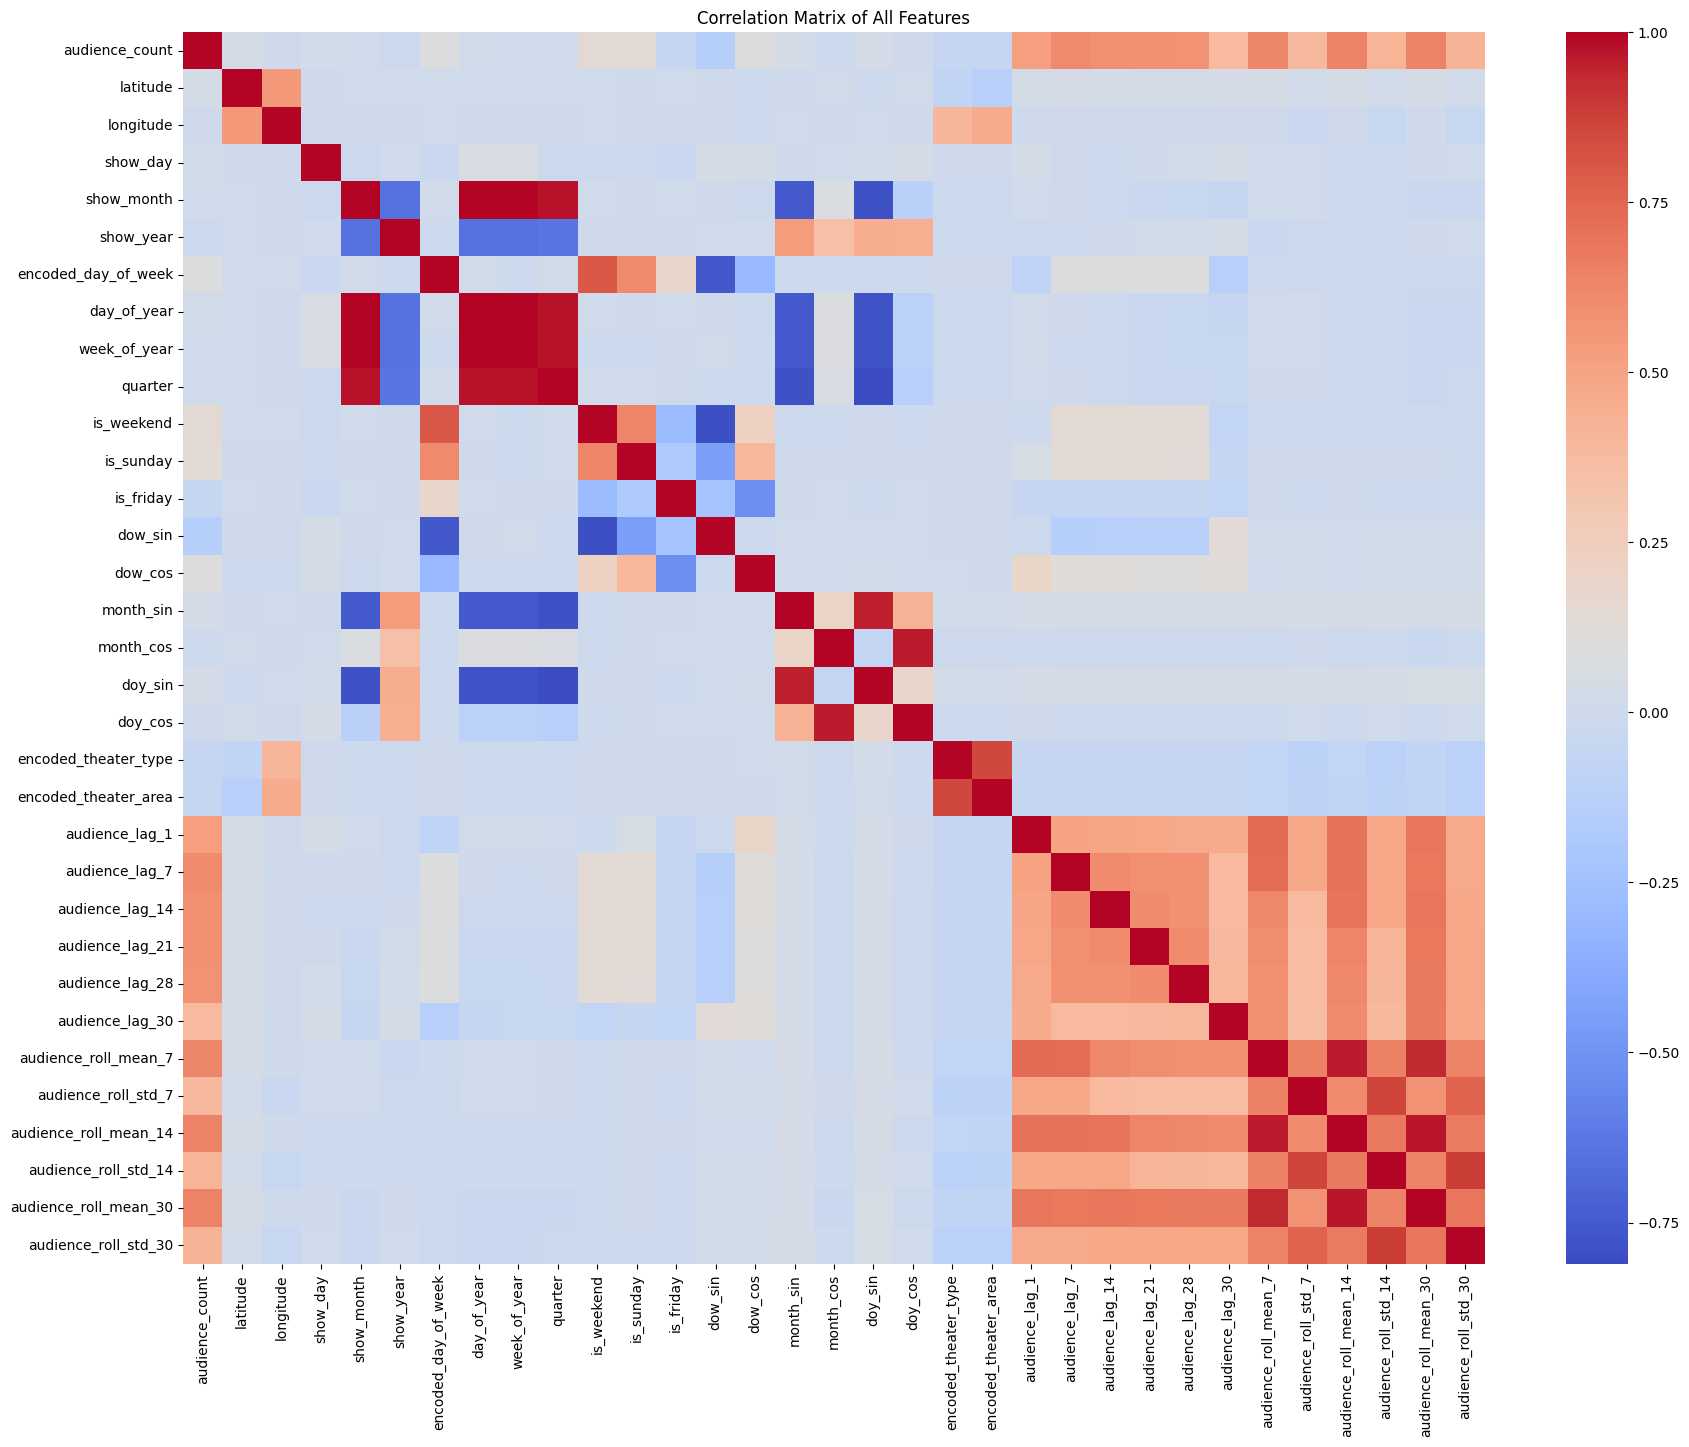

In [46]:
numeric_features = f_t_df.select_dtypes(include=['number']).columns.to_list()
  
# Correlation heatmap
plt.figure(figsize=(21, 16))
sns.heatmap(f_t_df[numeric_features].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix of All Features")
plt.show()


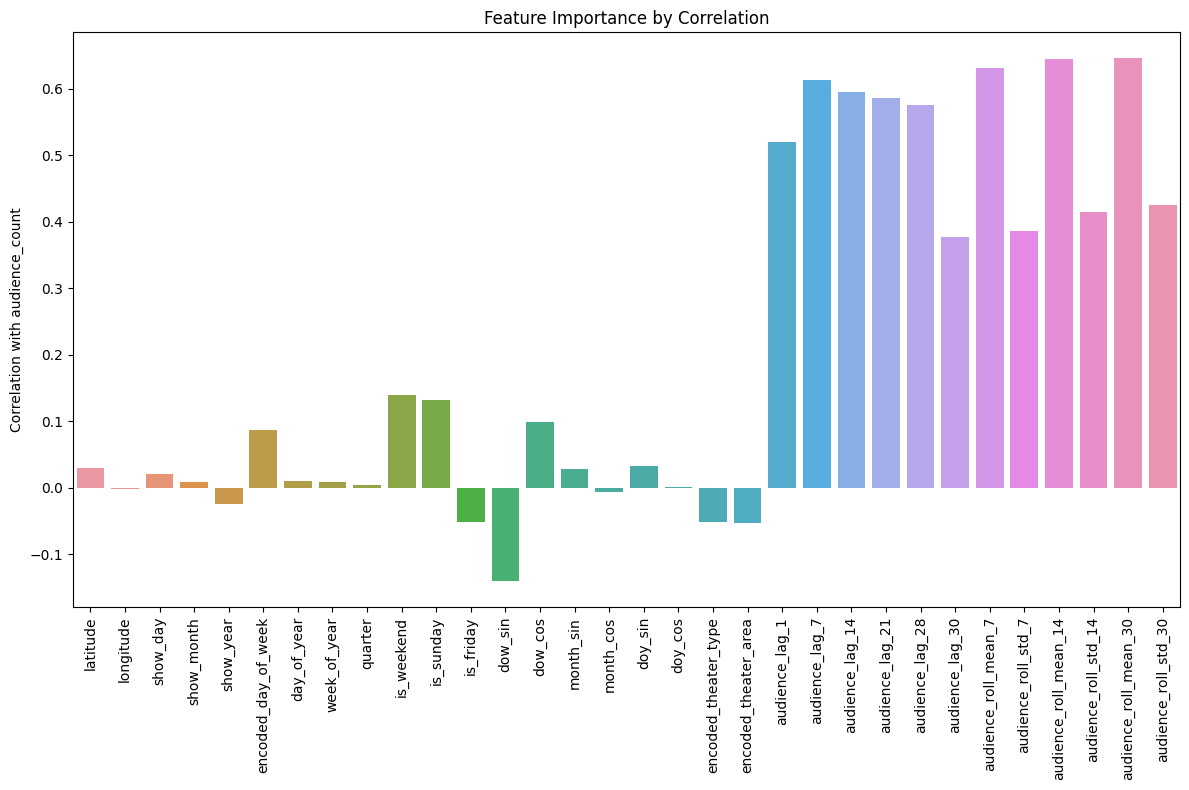

ranking correlated features highest to lowest
audience_roll_mean_30    0.645945
audience_roll_mean_14    0.644477
audience_roll_mean_7     0.631934
audience_lag_7           0.613246
audience_lag_14          0.595791
audience_lag_21          0.585738
audience_lag_28          0.576540
audience_lag_1           0.520474
audience_roll_std_30     0.425559
audience_roll_std_14     0.414401
audience_roll_std_7      0.386372
audience_lag_30          0.377529
is_weekend               0.140218
is_sunday                0.131470
dow_cos                  0.099427
encoded_day_of_week      0.086477
doy_sin                  0.032731
latitude                 0.030194
month_sin                0.027646
show_day                 0.021070
day_of_year              0.010182
show_month               0.008783
week_of_year             0.008661
quarter                  0.004374
doy_cos                  0.000955
longitude               -0.002043
month_cos               -0.006534
show_year               -0.024826
is

In [47]:
# Bar plot of correlations with target
target = "audience_count"
corr_with_target = f_t_df[numeric_features].corr()[target].drop(target)

plt.figure(figsize=(12, 8))
sns.barplot(x=corr_with_target.index, y=corr_with_target.values)
plt.xticks(rotation=90)
plt.ylabel("Correlation with audience_count")
plt.title("Feature Importance by Correlation")
plt.tight_layout()
plt.show()

# Print top correlations
print("ranking correlated features highest to lowest")
print(corr_with_target.sort_values(ascending=False).head(53))


### Pre Model Setting


In [48]:
# sicne this is forcasting based reg prob so it req time series split

f_t_df = f_t_df.sort_values('show_date').reset_index(drop=True)

# split in 80 - 20 
split_idx = int(len(f_t_df) * 0.8)

train_df = f_t_df.iloc[:split_idx].copy()
test_df = f_t_df.iloc[split_idx:].copy()

# Time Series Cross-Validation setup (on training data only)
tscv = TimeSeriesSplit(n_splits=2)


In [49]:
target_col = "audience_count"

# Separate X and y for train
y_train = train_df[target_col]
X_train = train_df.drop(columns=[target_col,
                                 'ID',
                                 'show_date',] , errors="ignore")


# separate X and y for test
y_test = test_df[target_col]
X_test = test_df.drop(columns=[target_col,
                                 'ID',
                                 'show_date'] , errors="ignore")


print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

  X_train: (171236, 36)
  y_train: (171236,)
  X_test: (42810, 36)
  y_test: (42810,)


In [50]:
print(X_train.isna().sum())
print(X_test.isna().sum())


book_theater_id              0
day_of_week                  0
theater_type                 0
theater_area                 0
latitude                     0
longitude                    0
show_day                     0
show_month                   0
show_year                    0
encoded_day_of_week          0
day_of_year                  0
week_of_year                 0
quarter                      0
is_weekend                   0
is_sunday                    0
is_friday                    0
dow_sin                      0
dow_cos                      0
month_sin                    0
month_cos                    0
doy_sin                      0
doy_cos                      0
encoded_theater_type         0
encoded_theater_area         0
audience_lag_1           19231
audience_lag_7           15881
audience_lag_14          20808
audience_lag_21          25668
audience_lag_28          30384
audience_lag_30          41394
audience_roll_mean_7       979
audience_roll_std_7       2156
audience

In [51]:
incomplete_col = [
    "audience_lag_1",
    "audience_lag_7",
    "audience_lag_14",
    "audience_lag_21",
    "audience_lag_28",
    "audience_lag_30",
    "audience_roll_mean_7",
    "audience_roll_std_7",
    "audience_roll_mean_14",
    "audience_roll_std_14",
    "audience_roll_mean_30",
    "audience_roll_std_30",
]
for col in incomplete_col:
    X_train[col].fillna(0, inplace=True)
    X_test[col].fillna(0, inplace=True)

In [52]:
# Creating Pre Processor

# creating numberical and categorical cols
numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=['number']).columns.tolist()


# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder( handle_unknown='ignore', sparse_output=False), categorical_cols)
    ])


### model Strategy:
1. I will use 3 models that are Dummy Reg, Linear Reg, Decision Tree
2. Dummy Reg will help me to set a floor of worst acceptable performanace
3. linear reg i use to test if linear relation exist or not
4. decision tree i use to test if non linear/tree model are better or not

In [53]:
# creating a common function for comparing base model
def base_model_comparison(model, model_name):

    # Create pipeline (preprocessing + model)
    pipeline = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])

    # Train model
    pipeline.fit(X_train, y_train)

    # Predict
    train_pred = pipeline.predict(X_train)
    test_pred  = pipeline.predict(X_test)

    # Scores
    train_r2  = r2_score(y_train, train_pred)
    test_r2   = r2_score(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae  = mean_absolute_error(y_test, test_pred)

    
    print("\nTrain Performance:")
    print("R²:", round(train_r2, 4))
    print("MAE:", round(train_mae, 2))

    print("\nTest Performance:")
    print("R²:", round(test_r2, 4))
    print("MAE:", round(test_mae, 2))






In [54]:
# from sklearn.dummy import DummyRegressor
# base_model_comparison(DummyRegressor(strategy='mean'), "Dummy Regressor")


In [55]:
# base_model_comparison(LinearRegression(), "Linear Regression")


In [56]:
# base_model_comparison(DecisionTreeRegressor(random_state=42), "Decision Tree Regressor")


### Observation on Model Output
1. since this were the outputs
---

for dummy reg

Train Performance:
  R² : 0.0
  MAE: 24.76

Test Performance:
  R² : -0.0011
  MAE: 24.54



---

for linear reg 

Train Performance:
  R² : 0.5189
  MAE: 15.12

Test Performance:
  R² : -7.608488841784314e+22
  MAE: 8442996548036.37




  
---

for decision tree

Train Performance:
  R² : 1.0
  MAE: 0.0
  


Test Performance:
  R² : -0.0832
  MAE: 21.97


  
---

from this it is clearlly confirms and also observed that tree based model are perfect for this df.

From above observation it is completly understandable that we need tree based model and with hpt only they might able to give me best r2 score. 
###### Stratigy: 
so finally i will test some tree based model and check which models are perfect and give me best r2 score after that we will calculate the best weights then we will simple train the complete dataset on that so that in last we get best r2 score.

In [57]:
# ## Models
# model 1 : Random Forest

# model_rf = RandomForestRegressor(
#     n_estimators=200,
#     max_depth = 16,    #
#     random_state=42,
#     n_jobs=-1)

# rf_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('random_forest', model_rf)
# ])

# rf_pipeline.fit(X_train, y_train)

# # Train scores
# rf_train_pred = rf_pipeline.predict(X_train)
# rf_train_r2  = r2_score(y_train, rf_train_pred)
# rf_train_mae = mean_absolute_error(y_train, rf_train_pred)

# print("\nTrain Performance:")
# print("R²:", round(rf_train_r2, 4))
# print("MAE:", round(rf_train_mae, 2))

# # Test scores
# rf_test_pred = rf_pipeline.predict(X_test)
# rf_test_r2 = r2_score(y_test, rf_test_pred)
# rf_test_mae = mean_absolute_error(y_test, rf_test_pred)

# print("\nTest Performance:")
# print("R² :", round(rf_test_r2, 4))
# print("MAE:", round(rf_test_mae, 2))





######################## OUTPUT #######################
# output = (without max depth parameter)

# Train Performance:
# R²: 0.9342
# MAE: 5.47

# Test Performance:
# R²: 0.5197
# MAE: 15.17


# output: (with max depth parameter)

# Train Performance:
# R²: 0.7452
# MAE: 12.38

# Test Performance:
# R²: 0.5241
# MAE: 15.05




Here i use random forest with max depth to 16 and without max depth parameter.
the reason to use only 16 is to minimize the overfitting 
since without max depth generalisation gap is 
0.9342 - 0.5197 = 0.4145
since this gap in r2 socre shows the gap is very high which show model is overfitting
and with max depth introduction the gap becomes 
0.745 - 0.524 = 0.21
this show the we have reduce the overfitting and we can now do hpt on rnadom forest

In [58]:
# # model 1 : Random Forest (HPT)

# param_dist_rf = {
#     'random_forest__n_estimators': [100, 200 ],
#     'random_forest__max_depth': [5, 10, 15, 20, None],
#     'random_forest__min_samples_split': [10, 20],
# }

# model_rf = RandomForestRegressor(
#     random_state=42, 
#     n_jobs=-1)

# rf_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('random_forest', model_rf)
# ])

# model_rf_cv = RandomizedSearchCV(
#     rf_pipeline,
#     param_distributions=param_dist_rf,
#     n_iter=10,
#     cv=tscv,
#     scoring='r2',  
#     n_jobs=-1,
#     random_state=42,
# )

# model_rf_cv.fit(X_train, y_train)

# # Best params
# print("best parameters:", model_rf_cv.best_params_)

# # Best R2
# print("best CV R2:", model_rf_cv.best_score_)

# # Build final model with best parameters
# best_params = model_rf_cv.best_params_

# best_model_rf = RandomForestRegressor(
#     n_estimators = best_params['random_forest__n_estimators'],
#     max_depth = best_params['random_forest__max_depth'],
#     min_samples_split = best_params['random_forest__min_samples_split'],
#     random_state=42,
#     n_jobs=-1
# )

# rf_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('random_forest', best_model_rf)
# ])

# rf_tuned_pipeline.fit(X_train, y_train)

# # Train scores
# train_pred = rf_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))

# # Test scores
# test_pred = rf_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))

'''
Fitting 2 folds for each of 10 candidates, totalling 20 fits

best parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 5, 'random_forest__max_depth': 20}
best CV R2: 0.5185869086520944

Train Performance:
R²: 0.7709
MAE: 11.11

Test Performance:
R²: 0.5248
MAE: 15.08
'''


"\nFitting 2 folds for each of 10 candidates, totalling 20 fits\n\nbest parameters: {'random_forest__n_estimators': 100, 'random_forest__min_samples_split': 5, 'random_forest__max_depth': 20}\nbest CV R2: 0.5185869086520944\n\nTrain Performance:\nR²: 0.7709\nMAE: 11.11\n\nTest Performance:\nR²: 0.5248\nMAE: 15.08\n"

before  hpt random forest test r2 was about 0.524 and now its again 0.524 but train data now will fits better in hpt
and mae intial was 15.05 and now it is 15.08 almost no change ok.

In [59]:
# # model 2 : Extra Trees
# model_et = ExtraTreesRegressor(
#     n_estimators=200,
#     max_depth=16,
#     random_state=42,
#     n_jobs=-1
# )

# et_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('extra_trees', model_et)
# ])

# et_pipeline.fit(X_train, y_train)

# # Train scores
# et_train_pred = et_pipeline.predict(X_train)
# et_train_r2  = r2_score(y_train, et_train_pred)
# et_train_mae = mean_absolute_error(y_train, et_train_pred)

# print("\nTrain Performance (Extra Trees):")
# print("R²:", round(et_train_r2, 4))
# print("MAE:", round(et_train_mae, 2))

# # Test scores
# et_test_pred = et_pipeline.predict(X_test)
# et_test_r2 = r2_score(y_test, et_test_pred)
# et_test_mae = mean_absolute_error(y_test, et_test_pred)

# print("\nTest Performance (Extra Trees):")
# print("R²:", round(et_test_r2, 4))
# print("MAE:", round(et_test_mae, 2))

'''
Train Performance (Extra Trees):
R²: 0.6786
MAE: 13.63

Test Performance (Extra Trees):
R²: 0.5425
MAE: 14.82
'''

'\nTrain Performance (Extra Trees):\nR²: 0.6786\nMAE: 13.63\n\nTest Performance (Extra Trees):\nR²: 0.5425\nMAE: 14.82\n'

In [60]:
# # model 2 : Extra Trees (HPT)

# param_dist_et = {
#     'extra_trees__n_estimators': [100, 200 ],
#     'extra_trees__max_depth': [5, 10, 15, 20, None],
#     'extra_trees__min_samples_split': [2, 5, 10, 20],
# }

# model_et = ExtraTreesRegressor(
#     random_state=42,
#     n_jobs=-1
# )

# et_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('extra_trees', model_et)
# ])


# model_et_cv  = RandomizedSearchCV(
#     et_pipeline,
#     param_distributions=param_dist_et,
#     n_iter=10,
#     cv=tscv,
#     scoring='r2',  
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# model_et_cv.fit(X_train, y_train)

# # Best params
# print("\nbest parameters:", model_et_cv.best_params_)

# # Best r2
# print("Best CV r2:", model_et_cv.best_score_)

# # Build final model with best parameters
# best_params = model_et_cv.best_params_

# best_model_et = ExtraTreesRegressor(
#     n_estimators = best_params['extra_trees__n_estimators'],
#     max_depth = best_params['extra_trees__max_depth'],    
#     min_samples_split = best_params['extra_trees__min_samples_split'],
#     random_state=42,
#     n_jobs=-1
# )

# et_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('extra_trees', best_model_et)
# ])

# et_tuned_pipeline.fit(X_train, y_train)

# # Train scores
# train_pred = et_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))

# # Test scores
# test_pred = et_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))


'''
Fitting 2 folds for each of 10 candidates, totalling 20 fits

best parameters: {'extra_trees__n_estimators': 100, 'extra_trees__min_samples_split': 5, 'extra_trees__max_depth': 20}
Best CV r2: 0.3930664296971299

Train Performance:
R²: 0.4142
MAE: 18.46

Test Performance:
R²: 0.3833
MAE: 18.81
  
'''


"\nFitting 2 folds for each of 10 candidates, totalling 20 fits\n\nbest parameters: {'extra_trees__n_estimators': 100, 'extra_trees__min_samples_split': 5, 'extra_trees__max_depth': 20}\nBest CV r2: 0.3930664296971299\n\nTrain Performance:\nR²: 0.4142\nMAE: 18.46\n\nTest Performance:\nR²: 0.3833\nMAE: 18.81\n  \n"

 Extra tree without hpt
 
 ---
 
 Train Performance (Extra Trees):
  R² : 0.6786
  MAE: 13.63

Test Performance (Extra Trees):
  R² : 0.5425
  MAE: 14.82

---
 
Extra tree without hpt

---
Train Performance:
R²: 0.4142
MAE: 18.46

Test Performance:
R²: 0.3833
MAE: 18.81
 
before hpt the training performance is fairly high and test performance was little lower and has acceptable Generalization and after hpt there is big drop in train and test performance and now after hpt the model is underfitting the data and hpt made the model worse. so hpt underfit the mdoel and reduce its learning capcity.

In [61]:
# # # model 3 : Decison Trees

# model_dt = DecisionTreeRegressor(
#     random_state=42
# )

# dt_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('decision_tree', model_dt)
# ])

# # Fit model
# dt_pipeline.fit(X_train, y_train)

# # Train scores
# dt_train_pred = dt_pipeline.predict(X_train)
# dt_train_r2  = r2_score(y_train, dt_train_pred)
# dt_train_mae = mean_absolute_error(y_train, dt_train_pred)

# print("\nTrain Performance (Decision Tree):")
# print("R²:", round(dt_train_r2, 4))
# print("MAE:", round(dt_train_mae, 2))

# #  Test scores 
# dt_test_pred = dt_pipeline.predict(X_test)
# dt_test_r2 = r2_score(y_test, dt_test_pred)
# dt_test_mae = mean_absolute_error(y_test, dt_test_pred)

# print("\nTest Performance (Decision Tree):")
# print("R²:", round(dt_test_r2, 4))
# print("MAE:", round(dt_test_mae, 2))

'''

Train Performance:
R²: 1.0
MAE: 0.0
  
Test Performance:
R²: -0.0832
MAE: 21.97

'''

'\n\nTrain Performance:\nR²: 1.0\nMAE: 0.0\n  \nTest Performance:\nR²: -0.0832\nMAE: 21.97\n\n'

In [62]:
# # # model 3 : Decison Trees (HPT)


# param_dist_dt = {
#     'decision_tree__max_depth': [5, 10, 15, 20, None],
#     'decision_tree__min_samples_split': [2, 5, 10, 20],
# }

# model_dt = DecisionTreeRegressor(
#     random_state=42
# )

# dt_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('decision_tree', model_dt)
# ])

# model_dt_cv = RandomizedSearchCV(
#     dt_pipeline,
#     param_distributions=param_dist_dt,
#     n_iter=10,
#     cv=tscv,
#     scoring='r2',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# model_dt_cv.fit(X_train, y_train)

# print("\nbest parameters:", model_dt_cv.best_params_)
# print("best CV r2:", model_dt_cv.best_score_)


# best_params = model_dt_cv.best_params_

# best_model_dt = DecisionTreeRegressor(
#     max_depth = best_params['decision_tree__max_depth'],
#     min_samples_split = best_params['decision_tree__min_samples_split'],
#     random_state=42
# )

# dt_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('decision_tree', best_model_dt)
# ])

# dt_tuned_pipeline.fit(X_train, y_train)

# train_pred = dt_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))


# test_pred = dt_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))

'''
Fitting 2 folds for each of 10 candidates, totalling 20 fits

best parameters: {'decision_tree__min_samples_split': 2, 'decision_tree__max_depth': 5}
best CV r2: 0.4621231525749027

Train Performance:
R²: 0.4838
MAE: 15.88

Test Performance:
R²: 0.4535
MAE: 15.95
  
'''

"\nFitting 2 folds for each of 10 candidates, totalling 20 fits\n\nbest parameters: {'decision_tree__min_samples_split': 2, 'decision_tree__max_depth': 5}\nbest CV r2: 0.4621231525749027\n\nTrain Performance:\nR²: 0.4838\nMAE: 15.88\n\nTest Performance:\nR²: 0.4535\nMAE: 15.95\n  \n"

 Decision Tree without hpt
 
 ---
 
Train Performance: 

R² : 1.0 
MAE: 0.0 

Test Performance: 

R² : -0.0832 
MAE: 21.97

---
 
Decision Tree without hpt

---

Train Performance:
R²: 0.4838
MAE: 15.88

Test Performance:
R²: 0.4535
MAE: 15.95
  

before hpt the decision tree showed extreme overfitting and training performace was perfect but test was extremly poor which shows a very large genralization gap 
1 - (-0.0832) = 1.0832 shows extreme overfitting
after hpt the overfitting overfitting get fixed and test score improved better
after hpt the generalization gap 
0.4838 - 0.4535 = 0.03 small and acceptable
this shows now after hpt the decision tree model is performing much better way.

In [63]:
# # # # model 4 : LightGBM 

# model_lgb = LGBMRegressor(
#     random_state=42
# )

# lgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('lightgbm', model_lgb)
# ])

# # Fit model
# lgb_pipeline.fit(X_train, y_train)

# #  Train scores 
# lgb_train_pred = lgb_pipeline.predict(X_train)
# lgb_train_r2  = r2_score(y_train, lgb_train_pred)
# lgb_train_mae = mean_absolute_error(y_train, lgb_train_pred)

# print("\nTrain Performance (LightGBM):")
# print("R²:", round(lgb_train_r2, 4))
# print("MAE:", round(lgb_train_mae, 2))

# # Test scores 
# lgb_test_pred = lgb_pipeline.predict(X_test)
# lgb_test_r2 = r2_score(y_test, lgb_test_pred)
# lgb_test_mae = mean_absolute_error(y_test, lgb_test_pred)

# print("\nTest Performance (LightGBM):")
# print("R²:", round(lgb_test_r2, 4))
# print("MAE:", round(lgb_test_mae, 2))

'''
Train Performance (LightGBM):
R²: 0.5814
MAE: 14.3

Test Performance (LightGBM):
R²: 0.5361
MAE: 14.99
  
'''

'\nTrain Performance (LightGBM):\nR²: 0.5814\nMAE: 14.3\n\nTest Performance (LightGBM):\nR²: 0.5361\nMAE: 14.99\n  \n'

In [64]:
# # # # model 4 : LightGBM (HPT)

# param_dist_lgb = {
#     'lgbm__max_depth': [8, 10, 12, 15],
#     'lgbm__learning_rate': [0.01, 0.05, 0.1],
#     'lgbm__n_estimators': [500, 1000, 1500],
#     'lgbm__reg_alpha': [0.01, 0.1, 0.5],
#     'lgbm__reg_lambda': [0.01, 0.1, 0.5]
# }

# model_lgb = LGBMRegressor(
#     random_state=42,
#     n_jobs=-1
# )

# lgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('lgbm', model_lgb)
# ])

# model_lgb_cv = RandomizedSearchCV(
#     lgb_pipeline,
#     param_distributions=param_dist_lgb,
#     n_iter=20,
#     cv=tscv,
#     scoring='r2',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# model_lgb_cv.fit(X_train, y_train)

# print("\nbest parameters:", model_lgb_cv.best_params_)
# print("best CV r2:", model_lgb_cv.best_score_)


# best_params = model_lgb_cv.best_params_

# best_model_lgb = LGBMRegressor(
#     max_depth = best_params['lgbm__max_depth'],
#     learning_rate = best_params['lgbm__learning_rate'],
#     n_estimators = best_params['lgbm__n_estimators'],
#     reg_alpha =  best_params['lgbm__reg_alpha'],
#     reg_lambda =  best_params['lgbm__reg_lambda'],
#     random_state=42,
#     n_jobs=-1
# )

# lgb_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('lgbm', best_model_lgb)
# ])

# lgb_tuned_pipeline.fit(X_train, y_train)


# train_pred = lgb_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))


# test_pred = lgb_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))

'''

best parameters: {'lgbm__reg_lambda': 0.5, 'lgbm__reg_alpha': 0.1, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.01}
best CV r2: 0.534407553598029

Train Performance:
R²: 0.5585
MAE: 14.58

Test Performance:
R²: 0.5395
MAE: 14.97
 '''

"\n\nbest parameters: {'lgbm__reg_lambda': 0.5, 'lgbm__reg_alpha': 0.1, 'lgbm__n_estimators': 500, 'lgbm__max_depth': 8, 'lgbm__learning_rate': 0.01}\nbest CV r2: 0.534407553598029\n\nTrain Performance:\nR²: 0.5585\nMAE: 14.58\n\nTest Performance:\nR²: 0.5395\nMAE: 14.97\n "

 LightGBM without hpt
 
 ---
 
Train Performance (LightGBM):
  R² : 0.5814
  MAE: 14.3

Test Performance (LightGBM):
  R² : 0.5361
  MAE: 14.99
  

---
 
LightGBM with hpt

---

Train Performance:
R²: 0.5585
MAE: 14.58

Test Performance:
R²: 0.5395
MAE: 14.97

---

this model is actually performing very well and its genralisation gap is very low 0.5585 - 0.5395 = 0.019 approx 
and train and test performance almost identical and test performace is improove little 
this means is the genralisation is good and very minimal overfitting. 
  

In [65]:
# # # # # model 5 : Hist Gradient Boosting 
# model_hgb = HistGradientBoostingRegressor(
#     random_state=42
# )

# hgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('hist_gbr', model_hgb)
# ])

# # Fit model
# hgb_pipeline.fit(X_train, y_train)

# # ---- Train scores ----
# hgb_train_pred = hgb_pipeline.predict(X_train)
# hgb_train_r2  = r2_score(y_train, hgb_train_pred)
# hgb_train_mae = mean_absolute_error(y_train, hgb_train_pred)

# print("\nTrain Performance (HistGradientBoosting):")
# print("R²:", round(hgb_train_r2, 4))
# print("MAE:", round(hgb_train_mae, 2))

# # ---- Test scores ----
# hgb_test_pred = hgb_pipeline.predict(X_test)
# hgb_test_r2 = r2_score(y_test, hgb_test_pred)
# hgb_test_mae = mean_absolute_error(y_test, hgb_test_pred)

# print("\nTest Performance (HistGradientBoosting):")
# print("R²:", round(hgb_test_r2, 4))
# print("MAE:", round(hgb_test_mae, 2))

'''
Train Performance (HistGradientBoosting):
R²: 0.5794
MAE: 14.31

Test Performance (HistGradientBoosting):
R²: 0.5382
MAE: 14.95
'''


'\nTrain Performance (HistGradientBoosting):\nR²: 0.5794\nMAE: 14.31\n\nTest Performance (HistGradientBoosting):\nR²: 0.5382\nMAE: 14.95\n'

In [66]:
# # # # # model 5 : Hist Gradient Boosting (HPT)


# param_dist_hgb = {
#     'hgb__max_depth': [6, 8, 10, 12, None],
#     'hgb__learning_rate': [0.01, 0.05, 0.1],
#     'hgb__max_iter': [500, 1000, 1500],
# }

# model_hgb = HistGradientBoostingRegressor(
#     random_state=42
# )

# hgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('hgb', model_hgb)
# ])



# model_hgb_cv = RandomizedSearchCV(
#     hgb_pipeline,
#     param_distributions=param_dist_hgb,
#     n_iter=20,
#     cv=tscv,
#     scoring='r2',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# model_hgb_cv.fit(X_train, y_train)

# print("\nbest parameters:", model_hgb_cv.best_params_)
# print("best CV r2:", model_hgb_cv.best_score_)

# best_params = model_hgb_cv.best_params_

# best_model_hgb = HistGradientBoostingRegressor(
#     max_depth = best_params['hgb__max_depth'],
#     learning_rate = best_params['hgb__learning_rate'],
#     max_iter = best_params['hgb__max_iter'],
#     random_state = 42
# )

# hgb_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('hgb', best_model_hgb)
# ])

# hgb_tuned_pipeline.fit(X_train, y_train)


# #Train Performance

# train_pred = hgb_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))


# # Test Performance
# test_pred = hgb_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))

'''
Fitting 2 folds for each of 20 candidates, totalling 40 fits

best parameters: {'hgb__max_iter': 500, 'hgb__max_depth': 8, 'hgb__learning_rate': 0.01}
best CV r2: 0.5266836220518083

Train Performance:
R²: 0.5575
MAE: 14.59

Test Performance:
R²: 0.5396
MAE: 14.95
'''


"\nFitting 2 folds for each of 20 candidates, totalling 40 fits\n\nbest parameters: {'hgb__max_iter': 500, 'hgb__max_depth': 8, 'hgb__learning_rate': 0.01}\nbest CV r2: 0.5266836220518083\n\nTrain Performance:\nR²: 0.5575\nMAE: 14.59\n\nTest Performance:\nR²: 0.5396\nMAE: 14.95\n"

 HistGradientBoosting without hpt
 
 ---
 
Train Performance (HistGradientBoosting):
  R² : 0.5794
  MAE: 14.31

Test Performance (HistGradientBoosting):
  R² : 0.5382
  MAE: 14.95
  

---
 
HistGradientBoosting without hpt

---

Train Performance:
R²: 0.5575
MAE: 14.59

Test Performance:
R²: 0.5396
MAE: 14.95

---

the hgb model strong and stable performance with minimal overfitting and test and train score were very close.
R² gap = 0.5575 − 0.5396 = 0.0179
and defalt hgb model is performing very well after hpt the model performance imporved slightly better 

In [67]:
# # # # # # model 6 : XG Boosting 

# model_xgb = XGBRegressor(
#     random_state=42,
#     n_jobs=-1
# )

# xgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('xgboost', model_xgb)
# ])

# # Fit model
# xgb_pipeline.fit(X_train, y_train)

# # ---- Train scores ----
# xgb_train_pred = xgb_pipeline.predict(X_train)
# xgb_train_r2  = r2_score(y_train, xgb_train_pred)
# xgb_train_mae = mean_absolute_error(y_train, xgb_train_pred)

# print("\nTrain Performance (XGBoost):")
# print("R²:", round(xgb_train_r2, 4))
# print("MAE:", round(xgb_train_mae, 2))

# # ---- Test scores ----
# xgb_test_pred = xgb_pipeline.predict(X_test)
# xgb_test_r2 = r2_score(y_test, xgb_test_pred)
# xgb_test_mae = mean_absolute_error(y_test, xgb_test_pred)

# print("\nTest Performance (XGBoost):")
# print("R²:", round(xgb_test_r2, 4))
# print("MAE:", round(xgb_test_mae, 2))

'''
Train Performance (XGBoost):
R²: 0.6536
MAE: 13.71

Test Performance (XGBoost):
R²: 0.4947
MAE: 15.37
'''

'\nTrain Performance (XGBoost):\nR²: 0.6536\nMAE: 13.71\n\nTest Performance (XGBoost):\nR²: 0.4947\nMAE: 15.37\n'

In [68]:
# # # # # # # model 6 : XG Boosting (HPT)

# param_dist_xgb = {
#     'xgb__n_estimators': [ 500, 1000, 1500],
#     'xgb__max_depth': [8, 10, 12, 15],
#     'xgb__learning_rate': [0.01, 0.05, 0.1],
#     'xgb__reg_alpha': [ 0.01, 0.1, 0.5],
#     'xgb__reg_lambda': [0.01, 0.1, 0.5]
# }

# model_xgb = XGBRegressor(
#     random_state=42,
#     n_jobs=-1
# )

# xgb_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('xgb', model_xgb)
# ])

# model_xgb_cv = RandomizedSearchCV(
#     xgb_pipeline,
#     param_distributions=param_dist_xgb,
#     n_iter=20,
#     cv=tscv,
#     scoring='r2',
#     n_jobs=-1,
#     random_state=42,
#     verbose=1
# )

# model_xgb_cv.fit(X_train, y_train)

# print("\nbest parameters:", model_xgb_cv.best_params_)
# print("best CV r2:", model_xgb_cv.best_score_)

# best_params = model_xgb_cv.best_params_

# best_model_xgb = XGBRegressor(
#     n_estimators = best_params['xgb__n_estimators'],
#     max_depth = best_params['xgb__max_depth'],
#     learning_rate = best_params['xgb__learning_rate'],
#     reg_alpha = best_params['xgb__reg_alpha'],
#     reg_lambda = best_params['xgb__reg_lambda'],
#     random_state=42,
#     n_jobs=-1
# )

# xgb_tuned_pipeline = Pipeline([
#     ('preprocess', preprocessor),
#     ('xgb', best_model_xgb)
# ])

# xgb_tuned_pipeline.fit(X_train, y_train)

# train_pred = xgb_tuned_pipeline.predict(X_train)
# train_r2  = r2_score(y_train, train_pred)
# train_mae = mean_absolute_error(y_train, train_pred)

# print("\nTrain Performance:")
# print("R²:", round(train_r2, 4))
# print("MAE:", round(train_mae, 2))

# test_pred = xgb_tuned_pipeline.predict(X_test)
# test_r2 = r2_score(y_test, test_pred)
# test_mae = mean_absolute_error(y_test, test_pred)

# print("\nTest Performance:")
# print("R²:", round(test_r2, 4))
# print("MAE:", round(test_mae, 2))

'''
Fitting 2 folds for each of 20 candidates, totalling 40 fits

best parameters: {'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 500, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.01}
best CV r2: 0.5223817320329294

Train Performance:
R²: 0.6535
MAE: 13.85

Test Performance:
R²: 0.5347
MAE: 15.0
'''

"\nFitting 2 folds for each of 20 candidates, totalling 40 fits\n\nbest parameters: {'xgb__reg_lambda': 0.5, 'xgb__reg_alpha': 0.1, 'xgb__n_estimators': 500, 'xgb__max_depth': 8, 'xgb__learning_rate': 0.01}\nbest CV r2: 0.5223817320329294\n\nTrain Performance:\nR²: 0.6535\nMAE: 13.85\n\nTest Performance:\nR²: 0.5347\nMAE: 15.0\n"

 XGB without hpt
 
 ---
 
Train Performance (XGBoost):
  R² : 0.6536
  MAE: 13.71

Test Performance (XGBoost):
  R² : 0.4947
  MAE: 15.37
  

---
 
XGB without hpt

---

Train Performance:
  R² : 0.6535
  MAE: 13.85

Test Performance:
  R² : 0.5347
  MAE: 15.0

---

intially the xgboost model show moderate overfitting with noticeably better performance on the training than on the test. 
genralisation gap is 0.6536 – 0.4947 = 0.1589
after hpt the models training performance is remains same and tunned model is less overfitted on data than default model.

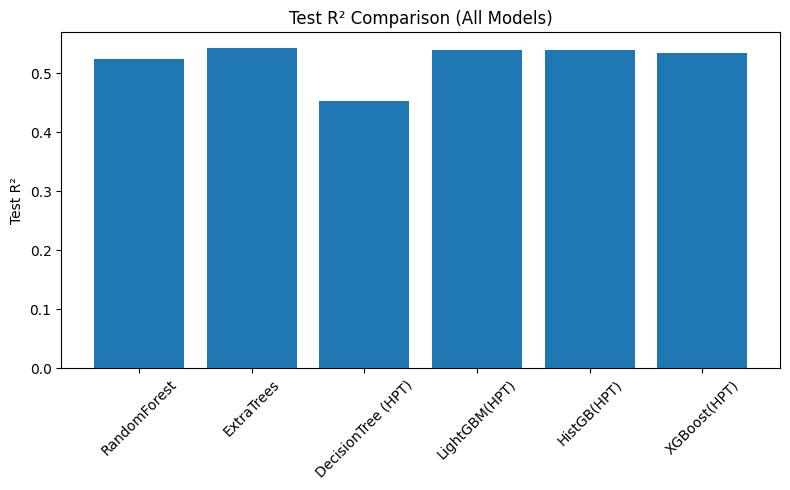

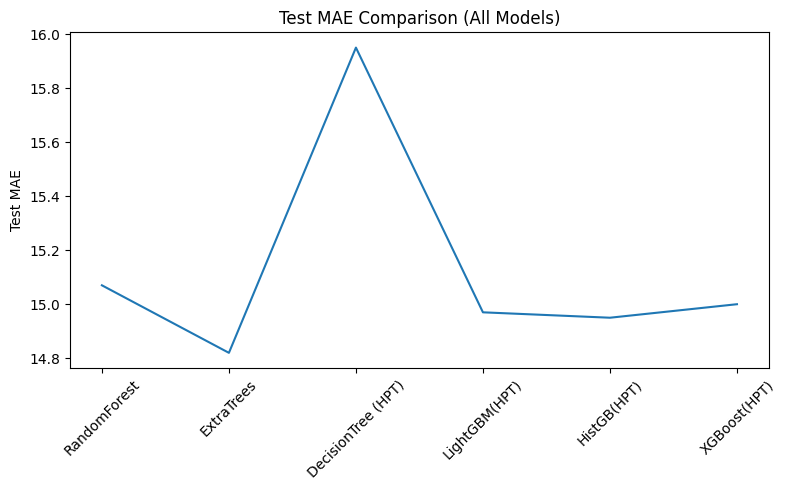

In [69]:
# graph of comparing test mae and test r2 score for finding best models for ensemble 
models = ["RandomForest","ExtraTrees","DecisionTree (HPT)","LightGBM(HPT)","HistGB(HPT)","XGBoost(HPT)"]

test_r2 = [0.5241, 0.5425, 0.4535, 0.5395, 0.5396, 0.5347]
mae = [15.07, 14.82, 15.95, 14.97,  14.95, 15.0]


plt.figure(figsize=(8,5))
plt.bar(models, test_r2)
plt.title("Test R² Comparison (All Models)")
plt.ylabel("Test R²")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,5))
plt.plot(models, mae)
plt.title("Test MAE Comparison (All Models)")
plt.ylabel("Test MAE")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### OBservation on models
from both graphs it clearly observed dt model is performing extremly worse, then followed by random forest
from these graphs its clearly decision tree and Random forest we need to drop all tree of these model and we have to use enseble of lightgbm, extra trees, histgb and xgb
i wont choose rndom forest because extra trees model is already providing me strong and randomized bagging so. and Et is more randomized and it inc diversity more and rf's r2 score is slightly lower than extra tree 
since enseble beinifits from combining diverse model so i use 1 bagging (Extra tree) and 3 boosting models (LightGBM, HistGBM, XGBoost) 

so first what we do is we try first each on individual select model then in last we create an enseblem of all 4 models

In [70]:
f_t_df.columns

Index(['book_theater_id', 'show_date', 'ID', 'day_of_week', 'audience_count',
       'theater_type', 'theater_area', 'latitude', 'longitude', 'show_day',
       'show_month', 'show_year', 'encoded_day_of_week', 'day_of_year',
       'week_of_year', 'quarter', 'is_weekend', 'is_sunday', 'is_friday',
       'dow_sin', 'dow_cos', 'month_sin', 'month_cos', 'doy_sin', 'doy_cos',
       'encoded_theater_type', 'encoded_theater_area', 'audience_lag_1',
       'audience_lag_7', 'audience_lag_14', 'audience_lag_21',
       'audience_lag_28', 'audience_lag_30', 'audience_roll_mean_7',
       'audience_roll_std_7', 'audience_roll_mean_14', 'audience_roll_std_14',
       'audience_roll_mean_30', 'audience_roll_std_30'],
      dtype='object')

In [71]:
# i will use OneHotEncoder on these
categorical_columns = [
    'book_theater_id', 
    'day_of_week', 
    'theater_type', 
    'theater_area'
]


# i will use MinMaxScaler on these
static_numerical_columns = [
    'latitude', 
    'longitude', 
    'show_day', 
    'show_month', 
    'show_year',
    'encoded_day_of_week', 
    'day_of_year', 
    'week_of_year', 
    'quarter',
    'is_weekend', 
    'is_sunday', 
    'is_friday',
    'dow_sin', 
    'dow_cos', 
    'month_sin', 
    'month_cos', 
    'doy_sin', 
    'doy_cos',
    'encoded_theater_type', 
    'encoded_theater_area'
]

# i will use MinMaxScaler on these
dynamic_columns = [
    'audience_lag_1', 
    'audience_lag_7', 
    'audience_lag_14',
    'audience_lag_21', 
    'audience_lag_28', 
    'audience_lag_30',
    'audience_roll_mean_7', 
    'audience_roll_std_7',
    'audience_roll_mean_14', 
    'audience_roll_std_14',
    'audience_roll_mean_30', 
    'audience_roll_std_30'
]



In [72]:
# Fill NaN in dynamic columns with 0
for column_name in dynamic_columns:
    if column_name in f_t_df.columns:
        f_t_df[column_name] = f_t_df[column_name].fillna(0)


In [73]:
y_train = f_t_df['audience_count'].values


In [74]:
print("Training samples:", len(y_train))


Training samples: 214046


In [75]:
# OHE for categorical columns
# MinMaxScaler for static and dynamic numerical columns
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
static_scaler = MinMaxScaler()
dynamic_scaler = MinMaxScaler()


In [76]:
### fitting
print("fitting start")
ohe_encoder.fit(f_t_df[categorical_columns])
print("cat fitted")
static_scaler.fit(f_t_df[static_numerical_columns])
print("static fitted")
dynamic_scaler.fit(f_t_df[dynamic_columns])
print("dynamic fitted")
print("completepreprocessor fitted")

fitting start
cat fitted
static fitted
dynamic fitted
completepreprocessor fitted


In [77]:
### transformation of train cols

X_train_categorical = ohe_encoder.transform(f_t_df[categorical_columns])
print("cat done")
X_train_static = static_scaler.transform(f_t_df[static_numerical_columns])
print("static done")
X_train_dynamic = dynamic_scaler.transform(f_t_df[dynamic_columns])
print("dynamic done")


cat done
static done
dynamic done


In [78]:
# combining all features 
X_train_combined = np.hstack([X_train_categorical, X_train_static, X_train_dynamic])


In [79]:
# creating historical data used for lag features since history dic stores audince count for each theater
history_dict = {}

all_theaters = f_t_df['book_theater_id'].unique()

for theater_id in all_theaters:
    theater_data = f_t_df[f_t_df['book_theater_id'] == theater_id]
    theater_data = theater_data.sort_values('show_date')
    audience_list = theater_data['audience_count'].tolist()
    history_dict[theater_id] = audience_list

print("total number of therathers are", len(history_dict))
print("  Example: book_00001 has", len(history_dict.get('book_00001', [])), "days of history")

total number of therathers are 826
  Example: book_00001 has 342 days of history


In [80]:
start_date = dt.date(2024, 3, 1)
end_date = dt.date(2024, 4, 22)
all_dates = pd.date_range(start=start_date, end=end_date)

all_booking_ids = []
for i in range(1, 830):
    booking_id = f"book_{i:05d}"
    all_booking_ids.append(booking_id)

In [81]:
# creating combinations ok

combinations = []
for date in all_dates:
    for booking_id in all_booking_ids:
        combinations.append((booking_id, date))


t_df = pd.DataFrame(combinations, columns=["book_theater_id", "show_date"])
t_df["show_date"] = pd.to_datetime(t_df["show_date"])
t_df["ID"] = t_df["book_theater_id"] + "_" + t_df["show_date"].dt.strftime("%Y-%m-%d")


In [82]:
### merging of meta data for test df
df6['show_date'] = pd.to_datetime(df6['show_date'])
t_df = t_df.merge(df6, on='show_date', how='left')
t_df = t_df.merge(df2, on='book_theater_id', how='left')

# filling nan
t_df['latitude'] = t_df['latitude'].fillna(f_t_df['latitude'].median()) # Use median from train
t_df['longitude'] = t_df['longitude'].fillna(f_t_df['longitude'].median())
t_df['theater_area'] = t_df['theater_area'].fillna('unknown_area')
t_df['theater_type'] = t_df['theater_type'].fillna('unknown_type')

# feature engg
t_df['show_day'] = t_df['show_date'].dt.day
t_df['show_month'] = t_df['show_date'].dt.month
t_df['show_year'] = t_df['show_date'].dt.year
t_df['encoded_day_of_week'] = t_df['show_date'].dt.dayofweek
t_df['day_of_year'] = t_df['show_date'].dt.dayofyear
t_df['week_of_year'] = t_df['show_date'].dt.isocalendar().week
t_df['quarter'] = t_df['show_date'].dt.quarter

t_df['is_weekend'] = (t_df['encoded_day_of_week'] >= 5).astype(int)
t_df['is_sunday'] = (t_df['encoded_day_of_week'] == 6).astype(int)
t_df['is_friday'] = (t_df['encoded_day_of_week'] == 4).astype(int)

# cyclical encodings
t_df['dow_sin'] = np.sin(2 * np.pi * t_df['encoded_day_of_week'] / 7)
t_df['dow_cos'] = np.cos(2 * np.pi * t_df['encoded_day_of_week'] / 7)
t_df['month_sin'] = np.sin(2 * np.pi * t_df['show_month'] / 12)
t_df['month_cos'] = np.cos(2 * np.pi * t_df['show_month'] / 12)
t_df['doy_sin'] = np.sin(2 * np.pi * t_df['day_of_year'] / 365)
t_df['doy_cos'] = np.cos(2 * np.pi * t_df['day_of_year'] / 365)

# 4. feature Engineering: Catorgrical Encoding
t_df['encoded_theater_type'] = t_df['theater_type'].map(theater_type_dict).fillna(0)
t_df['encoded_theater_area'] = t_df['theater_area'].map(theater_area_dict).fillna(0)

# # initialize audience_count as NaN (we will predict this)
# t_df['audience_count'] = np.nan

# Initialize lag columns with zeros
for column_name in dynamic_columns:
    t_df[column_name] = 0.0



In [83]:
#### transforming test feaatures ok
print("transformation start")
X_test_categorical = ohe_encoder.transform(t_df[categorical_columns])
print("cat done")
X_test_static = static_scaler.transform(t_df[static_numerical_columns])
print("transformation complete")


transformation start
cat done
transformation complete


In [ ]:
### model config
# Model 1: ExtraTrees
print("training model 1: extraTreesRegressor")
model_1_extratrees = ExtraTreesRegressor(
    n_estimators=200,
    max_depth=16,
    random_state=42,
    n_jobs=-1
)
model_1_extratrees.fit(X_train_combined, y_train)
print("model 1 trained")


training model 1: extraTreesRegressor


In [ ]:

# Model 2: LightGBM
print("training model 2: LGBMRegressor")
model_2_lightgbm = LGBMRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.01,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
model_2_lightgbm.fit(X_train_combined, y_train)
print("model 2 trained")



In [ ]:

# Model 3: HistGradientBoosting
print("training model 3: HistGradientBoostingRegressor")
model_3_histgb = HistGradientBoostingRegressor(
    max_iter=500,
    max_depth=8,
    learning_rate=0.01,
    random_state=42
)
model_3_histgb.fit(X_train_combined, y_train)
print("model 3 trained")


In [ ]:

# Model 4: XGBoost
print("training Model 4: XGBRegressor")
model_4_xgboost = XGBRegressor(
    n_estimators=500,
    max_depth=8,
    learning_rate=0.01,
    reg_alpha=0.1,
    reg_lambda=0.5,
    random_state=42,
    n_jobs=-1
)
model_4_xgboost.fit(X_train_combined, y_train)
print("model 4 trained")


In [ ]:
### predicting function 
def make_predictions_simple(model, model_name, test_dataframe, history_dictionary, X_test_cat, X_test_stat, dyn_scaler, dyn_cols):
    # make a copy of history so original is untouched
    current_history = {}
    for theater_id in history_dictionary:
        current_history[theater_id] = history_dictionary[theater_id].copy()

    # sort test data by date
    test_dataframe = test_dataframe.sort_values(['show_date', 'book_theater_id'])
    test_dataframe = test_dataframe.reset_index(drop=True)
    
    # get all unique dates
    all_unique_dates = sorted(test_dataframe['show_date'].unique())
    total_days = len(all_unique_dates)
    
    # create empty array to store predictions
    all_predictions = np.zeros(len(test_dataframe))
    
    
    # loop through each day
    day_number = 0
    
    while day_number < total_days:
        
        # get current date
        current_date = all_unique_dates[day_number]
        
        
        
        # get row indices for current date
        date_mask = test_dataframe['show_date'] == current_date
        row_indices = np.where(date_mask)[0]
        
        # get theaters for current date
        theaters_today = test_dataframe.loc[row_indices, 'book_theater_id'].values
        num_theaters = len(theaters_today)


        
        # CALCULATE LAG FEATURES FOR EACH THEATER
        # Create empty arrays for lag features
        lag_1_array = np.zeros(num_theaters)
        lag_7_array = np.zeros(num_theaters)
        lag_14_array = np.zeros(num_theaters)
        lag_21_array = np.zeros(num_theaters)
        lag_28_array = np.zeros(num_theaters)
        lag_30_array = np.zeros(num_theaters)
        roll_mean_7_array = np.zeros(num_theaters)
        roll_std_7_array = np.zeros(num_theaters)
        roll_mean_14_array = np.zeros(num_theaters)
        roll_std_14_array = np.zeros(num_theaters)
        roll_mean_30_array = np.zeros(num_theaters)
        roll_std_30_array = np.zeros(num_theaters)
        
        # loop through each theater
        theater_index = 0
        
        while theater_index < num_theaters:
            
            # get theater ID
            theater_id = theaters_today[theater_index]
            
            # get history for this theater
            if theater_id in current_history:
                theater_history = current_history[theater_id]
            else:
                theater_history = []
            
            # get length of history
            history_length = len(theater_history)
            
            # calculate lag features
            
            # lag 1 (yesterday)
            if history_length >= 1:
                lag_1_array[theater_index] = theater_history[-1]
            else:
                lag_1_array[theater_index] = 0
            
            # lag 7 (7 days ago)
            if history_length >= 7:
                lag_7_array[theater_index] = theater_history[-7]
            else:
                if history_length >= 1:
                    lag_7_array[theater_index] = theater_history[-1]
                else:
                    lag_7_array[theater_index] = 0
            
            # lag 14 (14 days ago)
            if history_length >= 14:
                lag_14_array[theater_index] = theater_history[-14]
            else:
                if history_length >= 1:
                    lag_14_array[theater_index] = theater_history[-1]
                else:
                    lag_14_array[theater_index] = 0
            
            # lag 21 (21 days ago)
            if history_length >= 21:
                lag_21_array[theater_index] = theater_history[-21]
            else:
                if history_length >= 1:
                    lag_21_array[theater_index] = theater_history[-1]
                else:
                    lag_21_array[theater_index] = 0
            
            # lag 28 (28 days ago)
            if history_length >= 28:
                lag_28_array[theater_index] = theater_history[-28]
            else:
                if history_length >= 1:
                    lag_28_array[theater_index] = theater_history[-1]
                else:
                    lag_28_array[theater_index] = 0
            
            # lag 30 (30 days ago)
            if history_length >= 30:
                lag_30_array[theater_index] = theater_history[-30]
            else:
                if history_length >= 1:
                    lag_30_array[theater_index] = theater_history[-1]
                else:
                    lag_30_array[theater_index] = 0
            
            # rolling features
            if history_length >= 1:
                # last 7 days
                if history_length >= 7:
                    last_7_days = theater_history[-7:]
                else:
                    last_7_days = theater_history
                
                # last 14 days
                if history_length >= 14:
                    last_14_days = theater_history[-14:]
                else:
                    last_14_days = theater_history
                
                # last 30 days
                if history_length >= 30:
                    last_30_days = theater_history[-30:]
                else:
                    last_30_days = theater_history
                
                # calculate mean and std
                roll_mean_7_array[theater_index] = np.mean(last_7_days)
                roll_mean_14_array[theater_index] = np.mean(last_14_days)
                roll_mean_30_array[theater_index] = np.mean(last_30_days)
                
                if len(last_7_days) > 1:
                    roll_std_7_array[theater_index] = np.std(last_7_days)
                else:
                    roll_std_7_array[theater_index] = 0
                
                if len(last_14_days) > 1:
                    roll_std_14_array[theater_index] = np.std(last_14_days)
                else:
                    roll_std_14_array[theater_index] = 0
                
                if len(last_30_days) > 1:
                    roll_std_30_array[theater_index] = np.std(last_30_days)
                else:
                    roll_std_30_array[theater_index] = 0
            
            # move to next theater
            theater_index = theater_index + 1
        
        # COMBINE LAG FEATURES INTO MATRIX
        
        # create matrix with all lag features
        # shape: (num_theaters, 12) because we have 12 lag/rolling features
        lag_feature_matrix = np.zeros((num_theaters, 12))
        
        lag_feature_matrix[:, 0] = lag_1_array
        lag_feature_matrix[:, 1] = lag_7_array
        lag_feature_matrix[:, 2] = lag_14_array
        lag_feature_matrix[:, 3] = lag_21_array
        lag_feature_matrix[:, 4] = lag_28_array
        lag_feature_matrix[:, 5] = lag_30_array
        lag_feature_matrix[:, 6] = roll_mean_7_array
        lag_feature_matrix[:, 7] = roll_std_7_array
        lag_feature_matrix[:, 8] = roll_mean_14_array
        lag_feature_matrix[:, 9] = roll_std_14_array
        lag_feature_matrix[:, 10] = roll_mean_30_array
        lag_feature_matrix[:, 11] = roll_std_30_array
        
        # SCALE LAG FEATURES (only thing we scale in loop!)        
        X_dynamic_scaled = dyn_scaler.transform(lag_feature_matrix)
        
        # COMBINE ALL FEATURES       
        # get pre-transformed categorical and static features for these rows
        X_cat_today = X_test_cat[row_indices]
        X_stat_today = X_test_stat[row_indices]
        
        # combining categorical + static + dynamic
        X_today_combined = np.hstack([X_cat_today, X_stat_today, X_dynamic_scaled])
        
        # MAKE PREDICTIONS        
        predictions_today = model.predict(X_today_combined)
        
        # make sure predictions are not negative
        predictions_today = np.maximum(predictions_today, 0)
        
        # Store predictions
        all_predictions[row_indices] = predictions_today
        
        # UPDATE HISTORY FOR NEXT DAY        
        theater_index = 0
        while theater_index < num_theaters:
            
            theater_id = theaters_today[theater_index]
            predicted_value = predictions_today[theater_index]
            
            # add prediction to history
            if theater_id not in current_history:
                current_history[theater_id] = []
            
            current_history[theater_id].append(predicted_value)
            
            theater_index = theater_index + 1
        
        # move to next day
        day_number = day_number + 1
    
    print("DONE")
    
    return all_predictions




In [ ]:
def create_aligned_submission(df_template, df_predictions, id_col='ID', target_col='audience_count', out_path='submission.csv'):


    # ENsure df_predictions only has ID + audience_count
    df_predictions = df_predictions[[id_col, target_col]]

    # drop old audience_count from orginal  
    if target_col in df_template.columns:
        df_template = df_template.drop(columns=[target_col])

    # merge template with predictions on ID
    final_submission = df_template.merge(
        df_predictions,
        on=id_col,
        how='left'
    )

    # fill missing prediction values with 0 or any fallback
    final_submission[target_col] = final_submission[target_col].fillna(0).astype(int)

    # save
    final_submission.to_csv(out_path, index=False)

    print(f"submission saved {out_path}")
    print(f"total rows: {len(final_submission)} (should be {len(df_template)})")

    return final_submission


In [ ]:
# # run Model 1: ExtraTrees
# print("MODEL 1: ExtraTrees")
# predictions_model_1 = make_predictions_simple(
#     model=model_1_extratrees,
#     model_name="ExtraTrees",
#     test_dataframe=t_df.copy(),
#     history_dictionary=history_dict,
#     X_test_cat=X_test_categorical,
#     X_test_stat=X_test_static,
#     dyn_scaler=dynamic_scaler,
#     dyn_cols=dynamic_columns
# )

# # save submission for Model 1
# submission_1 = pd.DataFrame()
# submission_1['ID'] = t_df['ID']
# submission_1['audience_count'] = np.round(predictions_model_1).astype(int)

# # create final aligned submission
# final_sub = create_aligned_submission(
#     df_template=df8,
#     df_predictions=submission_1,
#     id_col='ID',
#     target_col='audience_count',
#     out_path='submission.csv'
# )
# print("done")




In [ ]:
# run Model 2: LightGBM
print("MODEL 2: LightGBM")
predictions_model_2 = make_predictions_simple(
    model=model_2_lightgbm,
    model_name="LightGBM",
    test_dataframe=t_df.copy(),
    history_dictionary=history_dict,
    X_test_cat=X_test_categorical,
    X_test_stat=X_test_static,
    dyn_scaler=dynamic_scaler,
    dyn_cols=dynamic_columns
)

# save submission for Model 2
submission_2 = pd.DataFrame()
submission_2['ID'] = t_df['ID']
submission_2['audience_count'] = np.round(predictions_model_2).astype(int)

# create final aligned submission
final_sub = create_aligned_submission(
    df_template=df8,
    df_predictions=submission_2,
    id_col='ID',
    target_col='audience_count',
    out_path='submission.csv'
)
print("done")




In [ ]:
# # run Model 3: HistGradientBoosting
# print("MODEL 3: HistGradientBoosting ")
# predictions_model_3 = make_predictions_simple(
#     model=model_3_histgb,
#     model_name="HistGradientBoosting",
#     test_dataframe=t_df.copy(),
#     history_dictionary=history_dict,
#     X_test_cat=X_test_categorical,
#     X_test_stat=X_test_static,
#     dyn_scaler=dynamic_scaler,
#     dyn_cols=dynamic_columns
# )


# # save submission for Model 2
# submission_3 = pd.DataFrame()
# submission_3['ID'] = t_df['ID']
# submission_3['audience_count'] = np.round(predictions_model_3).astype(int)

# # create final aligned submission
# final_sub = create_aligned_submission(
#     df_template=df8,
#     df_predictions=submission_3,
#     id_col='ID',
#     target_col='audience_count',
#     out_path='submission.csv'
# )
# print("done")




In [ ]:
# # run Model 4: XGBoost
# print("MODEL 4: XGBoost ")
# predictions_model_4 = make_predictions_simple(
#     model=model_4_xgboost,
#     model_name="XGBoost",
#     test_dataframe=t_df.copy(),
#     history_dictionary=history_dict,
#     X_test_cat=X_test_categorical,
#     X_test_stat=X_test_static,
#     dyn_scaler=dynamic_scaler,
#     dyn_cols=dynamic_columns
# )


# # save submission for Model 2
# submission_4 = pd.DataFrame()
# submission_4['ID'] = t_df['ID']
# submission_4['audience_count'] = np.round(predictions_model_4).astype(int)

# # create final aligned submission
# final_sub = create_aligned_submission(
#     df_template=df8,
#     df_predictions=submission_4,
#     id_col='ID',
#     target_col='audience_count',
#     out_path='submission.csv'
# )
# print("done")


